# 🧪 Python Implementation (Audio Generation Model):


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
# 1. Define a simple WaveNet-inspired model for audio generation
class AudioGenerationModel(nn.Module):
    def __init__(self, in_channels=1, out_channels=1, num_layers=5, kernel_size=3):
        super(AudioGenerationModel, self).__init__()

        self.conv_layers = nn.ModuleList()

        # First convolutional layer
        self.conv_layers.append(nn.Conv1d(in_channels, 64, kernel_size=kernel_size, padding=kernel_size // 2))

        # Additional convolutional layers
        for _ in range(num_layers - 1):
            self.conv_layers.append(nn.Conv1d(64, 64, kernel_size=kernel_size, padding=kernel_size // 2))

        # Final output layer to produce audio sample
        self.fc = nn.Conv1d(64, out_channels, kernel_size=kernel_size, padding=kernel_size // 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        for conv_layer in self.conv_layers:
            x = self.relu(conv_layer(x))  # Apply ReLU activation
        return self.fc(x)


In [ ]:

# 2. Load and preprocess audio data
def load_audio(file_path, sr=22050):
    audio, _ = librosa.load(file_path, sr=sr)
    return torch.tensor(audio).float().unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions

Epoch [10/50], Loss: 0.0051


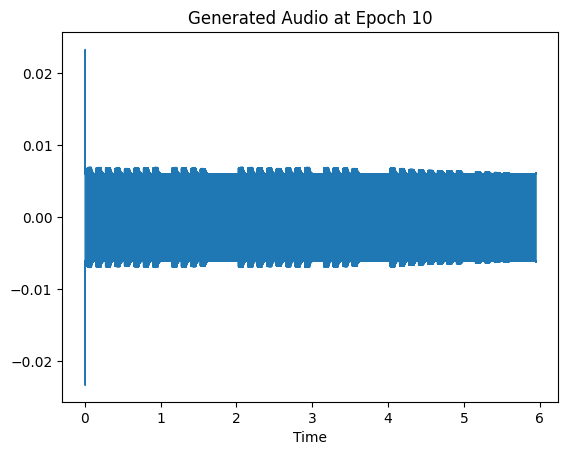

Epoch [20/50], Loss: 0.0048


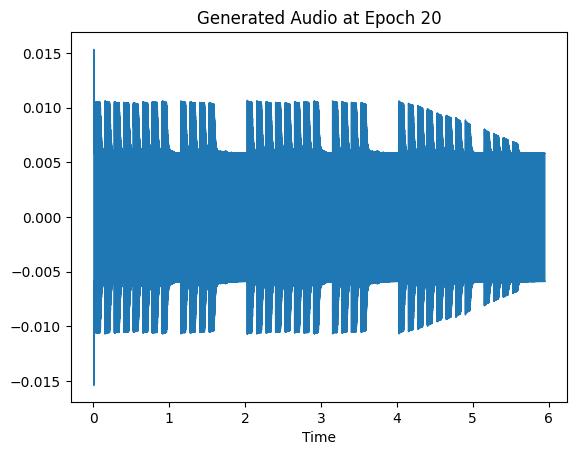

Epoch [30/50], Loss: 0.0045


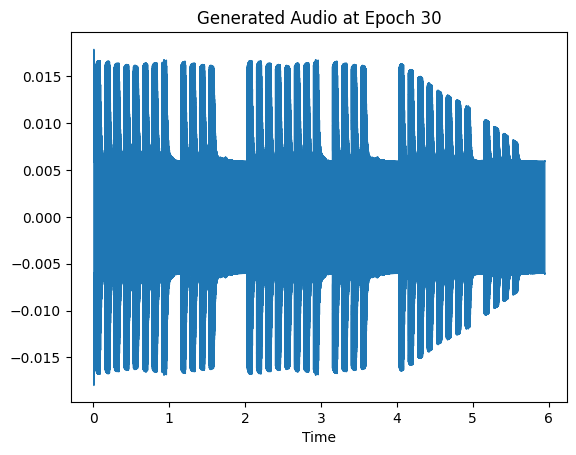

Epoch [40/50], Loss: 0.0036


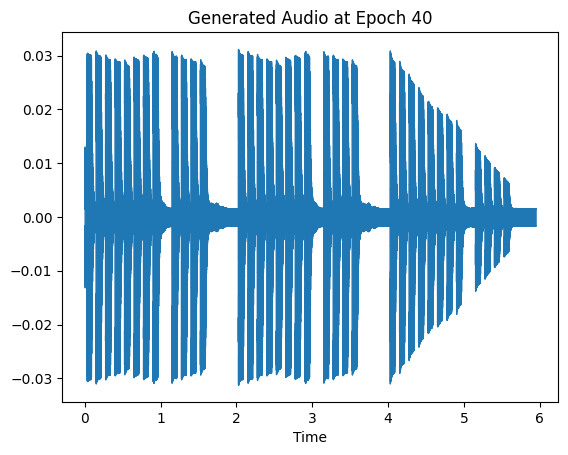

Epoch [50/50], Loss: 0.0021


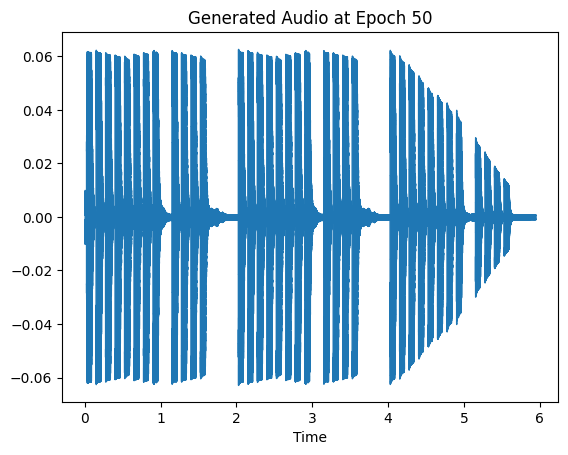

In [ ]:

# 3. Training loop for Audio Generation Model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AudioGenerationModel().to(device)

# Use an audio file as example input
audio_input = load_audio('path_to_your_audio_file.wav').to(device)

# Loss function and optimizer
criterion = nn.MSELoss()  # Using MSE loss for simplicity
optimizer = optim.Adam(model.parameters(), lr=0.0002)

num_epochs = 50
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Forward pass through the model
    generated_audio = model(audio_input)

    # Compute the loss
    loss = criterion(generated_audio, audio_input)
    loss.backward()

    # Update the model weights
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Generate and display sample audio every few epochs
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            generated_audio_sample = generated_audio.squeeze().cpu().numpy()
            librosa.display.waveshow(generated_audio_sample, sr=22050)
            plt.title(f"Generated Audio at Epoch {epoch + 1}")
            plt.show()
